# **Exploratory Data Analysis**


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Import libriries


In [1]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 4.9 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 6.0 MB/s eta 0:00:000:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 10.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.3 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 8.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kern

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


Load the dataset into a dataframe.


## Load the dataset

In [2]:
file_name = 'dataset/normilized_data.csv'
df = pd.read_csv(file_name)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


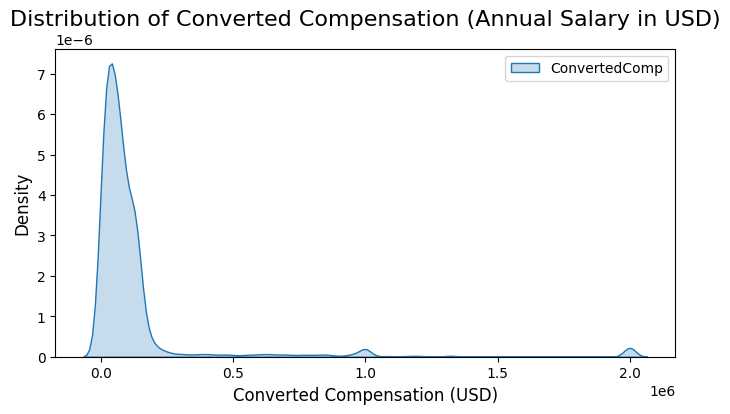

In [9]:
df_cleaned = df[['ConvertedComp']].dropna()

plt.figure(figsize=(8,4))
sns.kdeplot(df_cleaned, color='blue', fill=True, bw_adjust=.5)

# Add title and labels
plt.title('Distribution of Converted Compensation (Annual Salary in USD)', fontsize=16)
plt.xlabel('Converted Compensation (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.show()

Plot the histogram for the column `ConvertedComp`.


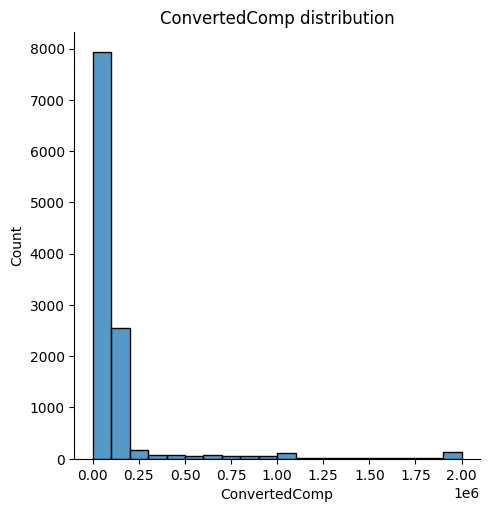

In [10]:
sns.displot(df_cleaned, x="ConvertedComp", bins=20)

plt.title('ConvertedComp distribution')
plt.show()

The median of the column `ConvertedComp`?


In [12]:
int(df['ConvertedComp'].median())

63016

The responders identified themselves only as a **Man**


In [13]:
df[df['Gender'] == 'Man'].shape[0]

10553

The  median ConvertedComp of responders identified themselves only as a **Woman**


In [15]:
int(df[df['Gender'] == 'Woman']['ConvertedComp'].median())

61071

Five number summary for the column `Age`:

In [19]:
minimum = df.Age.min()
first_guartile = df.Age.quantile(0.25)
median = df.Age.median()
third_quartile = df.Age.quantile(0.75)
maximum = df.Age.max()

minimum, first_guartile, median, third_quartile, maximum

(np.float64(16.0),
 np.float64(26.0),
 np.float64(29.0),
 np.float64(34.0),
 np.float64(99.0))

Plot a histogram of the column `Age`.


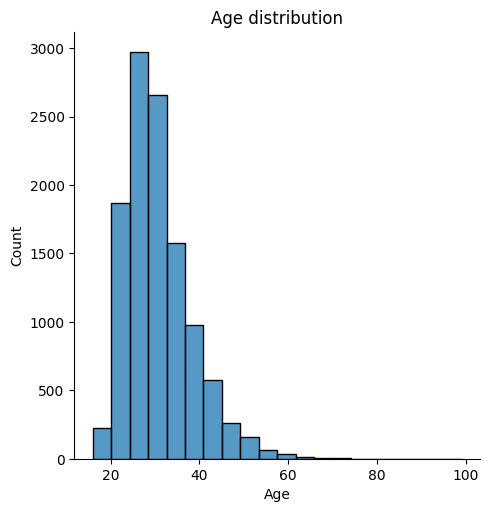

In [20]:
df_cleaned = df[['Age']].dropna()

sns.displot(df_cleaned, x="Age", bins=20)
plt.title('Age distribution')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


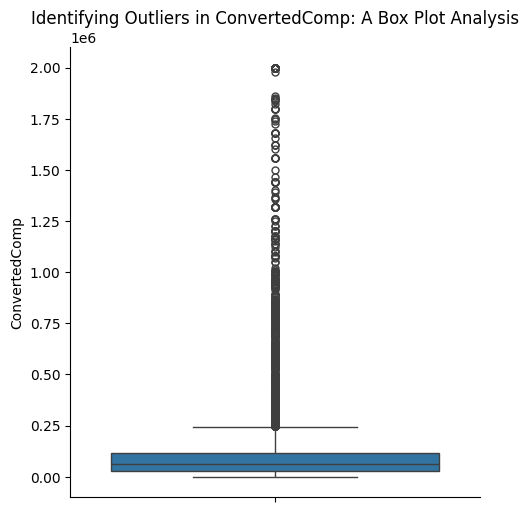

In [21]:
sns.catplot(data=df['ConvertedComp'], kind="box")
plt.title('Identifying Outliers in ConvertedComp: A Box Plot Analysis')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
first_guartile = df.ConvertedComp.quantile(0.25)
third_quartile = df.ConvertedComp.quantile(0.75)
inter_quartile_range = third_quartile - first_guartile

first_guartile, third_quartile, inter_quartile_range

(np.float64(29016.0), np.float64(115464.0), np.float64(86448.0))

Find out the upper and lower bounds.


In [23]:
lower_bound = first_guartile - 1.5 * inter_quartile_range
upper_bound = third_quartile + 1.5 * inter_quartile_range
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

Lower Bound: -100656.0
Upper Bound: 245136.0


Identify how many outliers are there in the `ConvertedComp` column.


In [24]:
df[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)].shape[0]

811

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
df_without_outliers = df[(df['ConvertedComp'] <= upper_bound) & (df['ConvertedComp'] >= lower_bound)]

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [29]:
numeric_columns = df_without_outliers._get_numeric_data().columns

for col in numeric_columns:
    if col != 'Age':
        print(f'Correlation between Age and {col} = {df_without_outliers['Age'].corr(df_without_outliers[col]).round(3)}')



Correlation between Age and Unnamed: 0 = 0.002
Correlation between Age and Respondent = 0.002
Correlation between Age and CompTotal = 0.006
Correlation between Age and ConvertedComp = 0.333
Correlation between Age and WorkWeekHrs = 0.038
Correlation between Age and CodeRevHrs = -0.016
Correlation between Age and NormalizedAnnualCompensation = -0.016


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
